# 1. Data

**[컬럼 세부]**

  * **Survival** - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주합니다.
  * **Pclass** - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않습니다.
  * **Sex** - 성별. 남자(male)와 여자(female)이 있습니다.
  * **Age** - 나이입니다. 틈틈히 빈 값이 존재하며, 소수점 값도 존재합니다.
  * **SibSp** - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수입니다.
  * **Parch** - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수입니다.
  * **Ticket** - 티켓 번호입니다. 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Fare** - 운임 요금입니다. 소수점으로 구성되어 있습니다.
  * **Cabin** - 객실 번호입니다. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Embarked** - 선착장입니다. C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 지역, S는 사우스햄튼(Southampton)이라는 영국 지역입니다.


In [1]:
train = pd.read_csv("/Users/kimjeongseob/Desktop/Study/0.Project/3. Machine Learning Practice/dataset/titanic/train.csv",index_col="PassengerId")
test = pd.read_csv("/Users/kimjeongseob/Desktop/Study/0.Project/3. Machine Learning Practice/dataset/titanic/test.csv",index_col="PassengerId")

In [2]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.shape

(891, 11)

In [4]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
test.shape

(418, 10)

# 2. Preprocessing

    [sckikit-learn 알고리즘에 사용 가능한 데이터 자료형]
    
    1. 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어야 함
    2. 데이터에 빈 값이 없어야 함
   

### 2-0. missing value

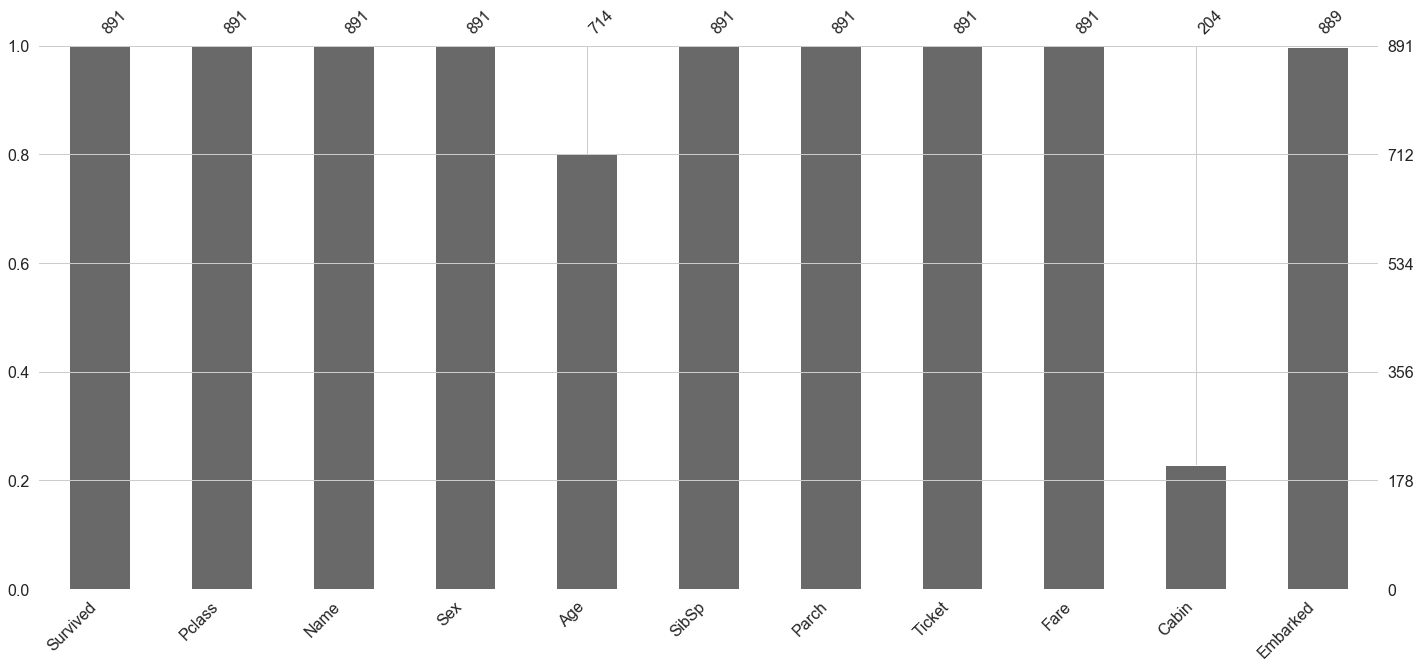

In [6]:
%matplotlib inline
import missingno as msno

msno.bar(train)

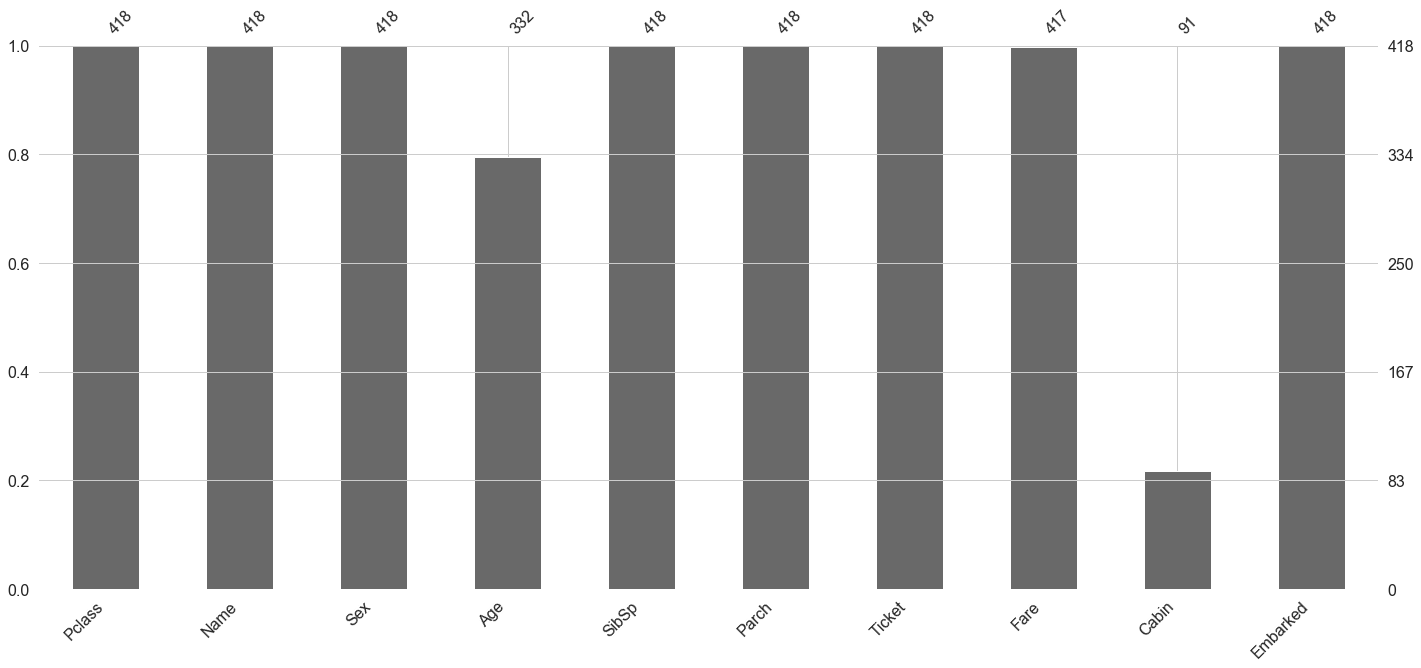

In [7]:
# 'Fare'에 missing value 확인
msno.bar(test)

### 2-1. Encode 'Sex' column

    1. male : 0
    2. female : 1

In [8]:
train.loc[train.Sex == 'male','Sex_encoded'] = 0
train.loc[train.Sex == 'female','Sex_encoded'] = 1
test.loc[test.Sex == 'male','Sex_encoded'] = 0
test.loc[test.Sex == 'female','Sex_encoded'] = 1

In [9]:
train.Sex_encoded.unique()

array([0., 1.])

In [10]:
train[['Sex','Sex_encoded']].head(5)

,Sex,Sex_encoded
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


### 2-2. Fill in missing fare (test data)

- mean 값으로 채우기

In [11]:
train[train.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
PassengerId,,,,,,,,,,,,


In [12]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [13]:
train['Fare_filled'] = train.Fare
test['Fare_filled'] = test.Fare

In [14]:
train[['Fare','Fare_filled']].head(3)

,Fare,Fare_filled
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250


In [15]:
test[['Fare','Fare_filled']].head(3)

,Fare,Fare_filled
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875


In [16]:
test.loc[test.Fare.isnull(),'Fare_filled'] = test.Fare.mean()

In [17]:
test[test.Fare.isnull()][['Fare','Fare_filled']]

,Fare,Fare_filled
PassengerId,,
1044,NaN,35.627188


In [18]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Fare_filled
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.9250


In [19]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Fare_filled
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,7.8292
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,7.0000
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,9.6875


### 2-3. Encode Embarked

column 'Embarked'
- C : 0
- S : 1
- Q : 2

column 'Embarked_C, Embarked_S, Embarked_Q'
- True / False

In [20]:
train['Embarked_encoded'] = train.Embarked
test['Embarked_encoded'] = test.Embarked

In [21]:
train.loc[train['Embarked'] == 'C','Embarked_encoded'] = 0
train.loc[train['Embarked'] == 'S','Embarked_encoded'] = 1
train.loc[train['Embarked'] == 'Q','Embarked_encoded'] = 2
test.loc[test['Embarked'] == 'Q','Embarked_encoded'] = 0
test.loc[test['Embarked'] == 'S','Embarked_encoded'] = 1
test.loc[test['Embarked'] == 'Q','Embarked_encoded'] = 2

In [22]:
train['Embarked_C'] = train.Embarked == 'C'
train['Embarked_S'] = train.Embarked == 'S'
train['Embarked_Q'] = train.Embarked == 'Q'

In [23]:
test['Embarked_C'] = test.Embarked == 'C'
test['Embarked_S'] = test.Embarked == 'S'
test['Embarked_Q'] = test.Embarked == 'Q'

In [24]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Fare_filled,Embarked_encoded,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,7.2500,1,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,71.2833,0,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.9250,1,False,True,False


In [25]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Fare_filled,Embarked_encoded,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,7.8292,2,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,7.0000,1,False,True,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,9.6875,2,False,False,True


In [26]:
train.shape

(891, 17)

In [27]:
test.shape

(418, 16)

### 2-4. Age fill in

Age : mean 값

In [28]:
train['Age_filled'] = train.Age
test['Age_filled'] = test.Age

In [29]:
train.loc[train.Age.isnull(),'Age_filled'] = train.Age.mean()
test.loc[test.Age.isnull(),'Age_filled'] = test.Age.mean()

In [30]:
test[test.Age.isnull()][['Age','Age_filled']]

,Age,Age_filled
PassengerId,,
902,NaN,30.27259
914,NaN,30.27259
921,NaN,30.27259
925,NaN,30.27259
928,NaN,30.27259
...,...,...
1300,NaN,30.27259
1302,NaN,30.27259
1305,NaN,30.27259


In [31]:
train[train.Age.isnull()][['Age','Age_filled']]

,Age,Age_filled
PassengerId,,
6,NaN,29.699118
18,NaN,29.699118
20,NaN,29.699118
27,NaN,29.699118
29,NaN,29.699118
...,...,...
860,NaN,29.699118
864,NaN,29.699118
869,NaN,29.699118


In [32]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Fare_filled,Embarked_encoded,Embarked_C,Embarked_S,Embarked_Q,Age_filled
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,7.2500,1,False,True,False,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,71.2833,0,True,False,False,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.9250,1,False,True,False,26.0


# 3. Train

In [33]:
feature_names = ["Pclass", "Sex_encoded", "Fare_filled",
                 "Embarked_C", "Embarked_S", "Embarked_Q","Age_filled"]
feature_names

['Pclass',
 'Sex_encoded',
 'Fare_filled',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Age_filled']

In [34]:
label_name = "Survived"
label_name

'Survived'

In [35]:
X_train = train[feature_names]
X_train.head(3)

,Pclass,Sex_encoded,Fare_filled,Embarked_C,Embarked_S,Embarked_Q,Age_filled
PassengerId,,,,,,,
1,3,0.0,7.2500,False,True,False,22.0
2,1,1.0,71.2833,True,False,False,38.0
3,3,1.0,7.9250,False,True,False,26.0


In [36]:
X_test = test[feature_names]
X_test.head(3)

,Pclass,Sex_encoded,Fare_filled,Embarked_C,Embarked_S,Embarked_Q,Age_filled
PassengerId,,,,,,,
892,3,0.0,7.8292,False,False,True,34.5
893,3,1.0,7.0000,False,True,False,47.0
894,2,0.0,9.6875,False,False,True,62.0


In [37]:
y_train = train[label_name]
y_train.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

### 3-1. QDA

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)

In [39]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(qda.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[502,  47],
       [305,  37]])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74       549
           1       0.44      0.11      0.17       342

    accuracy                           0.60       891
   macro avg       0.53      0.51      0.46       891
weighted avg       0.55      0.60      0.52       891



In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, qda.predict_proba(X_train)[:, 1])

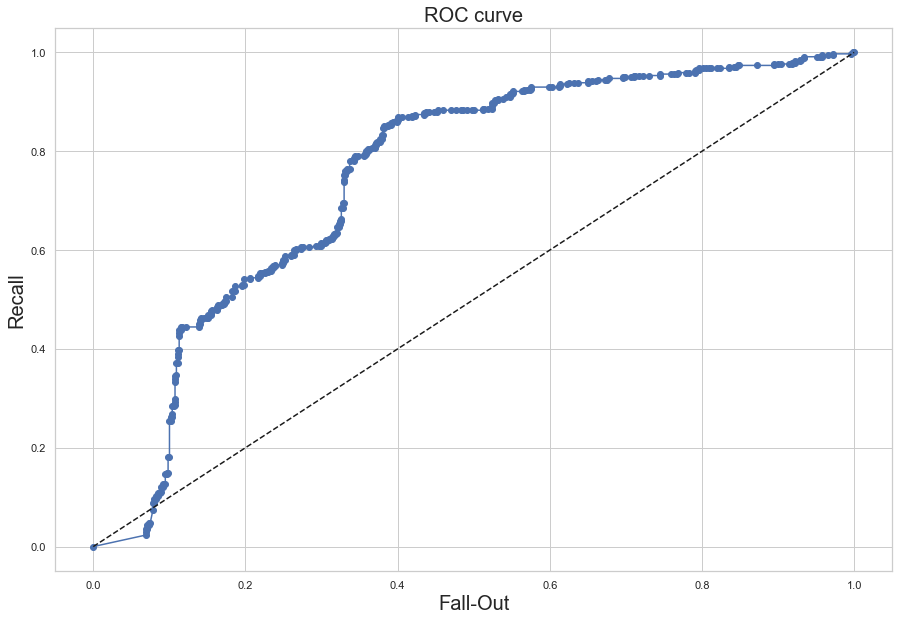

In [42]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="QDA")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=20)
plt.ylabel('Recall',fontsize=20)
plt.title('ROC curve',fontsize=20)
plt.show()

### 3-2. LDA

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X_train, y_train)

In [44]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(lda.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[463,  86],
       [100, 242]])

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       549
           1       0.74      0.71      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, lda.predict_proba(X_train)[:, 1])

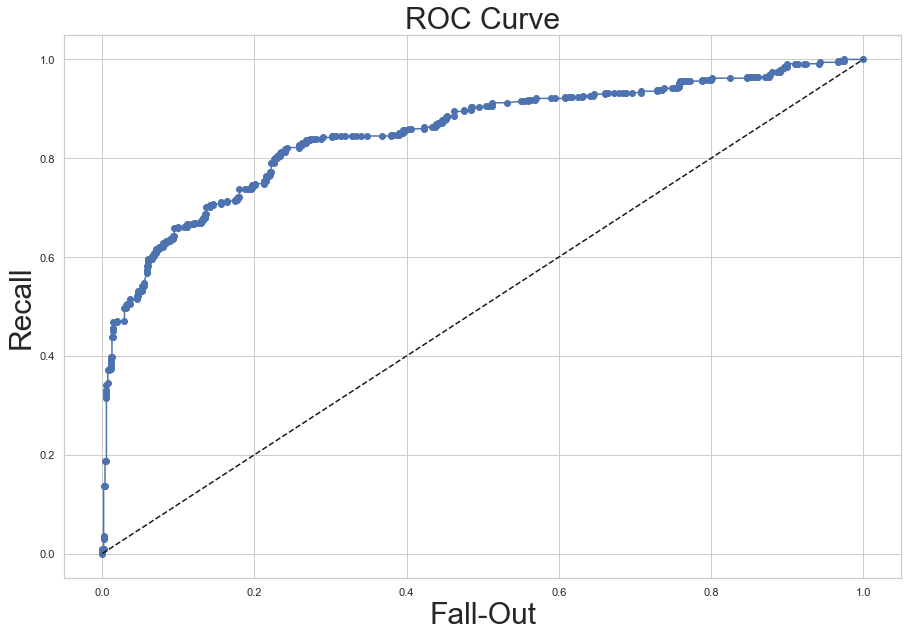

In [47]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="LDA")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

### 3-3. NB

In [48]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(X_train, y_train)

In [49]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(NB.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[477,  72],
       [112, 230]])

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       549
           1       0.76      0.67      0.71       342

    accuracy                           0.79       891
   macro avg       0.79      0.77      0.78       891
weighted avg       0.79      0.79      0.79       891



In [51]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])

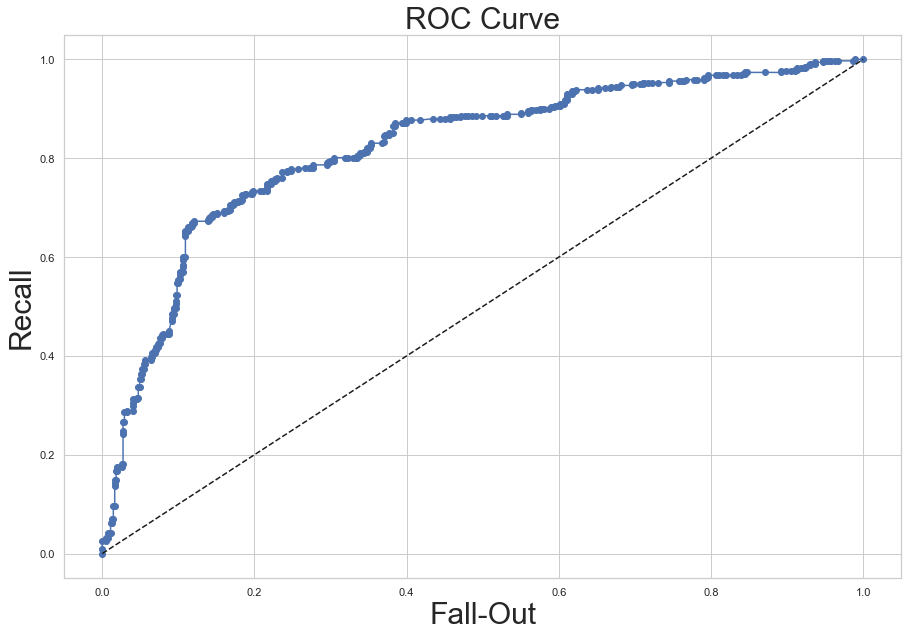

In [52]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="Naive-Bayes")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

### 3-4. QDA, LDA, NB 비교

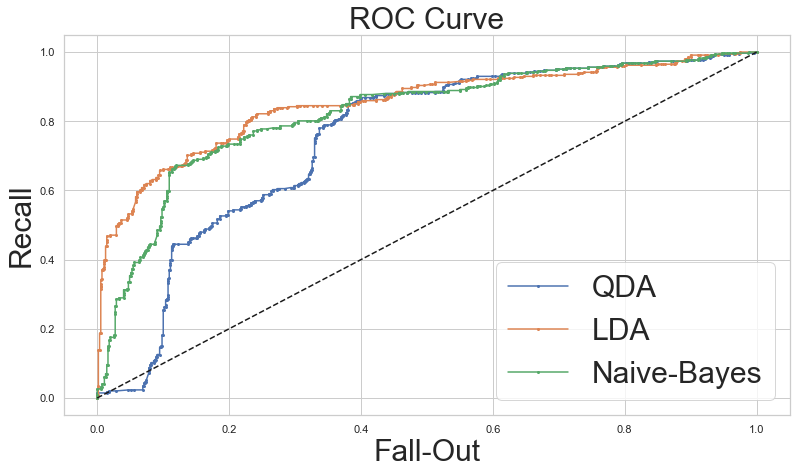

LDA의 AUC : 0.8508 / QDA의 AUC : 0.7486 / Naive-Bayes의 AUC : 0.8218


In [53]:
from sklearn.metrics import auc

fpr1, tpr1, thresholds1 = roc_curve(y_train, qda.decision_function(X_train))
fpr2, tpr2, thresholds1 = roc_curve(y_train, lda.decision_function(X_train))
fpr3, tpr3, thresholds3 = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])

plt.figure(figsize=(13,7))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="QDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="LDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="Naive-Bayes")
plt.legend(fontsize=30)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

auc_qda = auc(fpr1,tpr1)
auc_lda = auc(fpr2,tpr2)
auc_NB = auc(fpr3,tpr3)
print("LDA의 AUC : {} / QDA의 AUC : {} / Naive-Bayes의 AUC : {}".
      format(round(auc_lda,4),round(auc_qda,4),round(auc_NB,4)))

### 3-5. K-fold Cross validation test

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

qda_CV = cross_val_score(qda, X_train, y_train, scoring=None, cv=5)
lda_CV = cross_val_score(lda, X_train, y_train, scoring=None, cv=5)
NB_CV = cross_val_score(NB, X_train, y_train, scoring=None, cv=5)

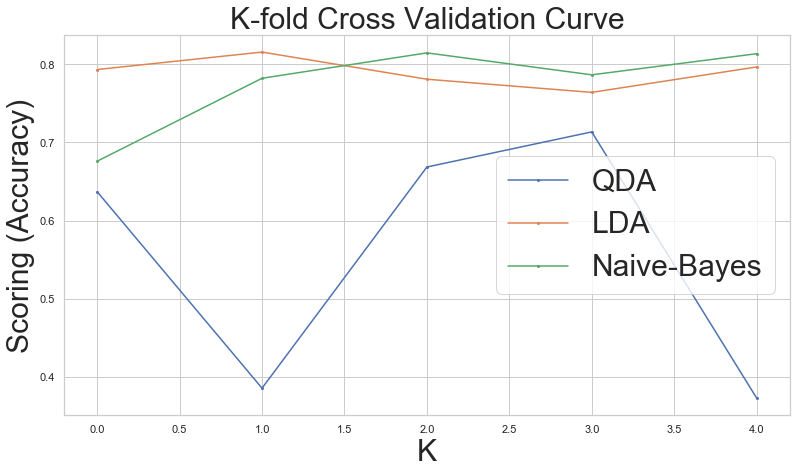

In [55]:
plt.figure(figsize=(13,7))
plt.plot(qda_CV, 'o-', ms=2, label="QDA")
plt.plot(lda_CV, 'o-', ms=2, label="LDA")
plt.plot(NB_CV, 'o-', ms=2, label="Naive-Bayes")
plt.legend(fontsize=30)
plt.xlabel('K',fontsize=30)
plt.ylabel('Scoring (Accuracy)',fontsize=30)
plt.title('K-fold Cross Validation Curve',fontsize=30)
plt.show()

### 3-6. Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression().fit(X_train,y_train)

In [57]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(Logit.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[462,  87],
       [ 98, 244]])

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       549
           1       0.74      0.71      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, Logit.predict_proba(X_train)[:, 1])

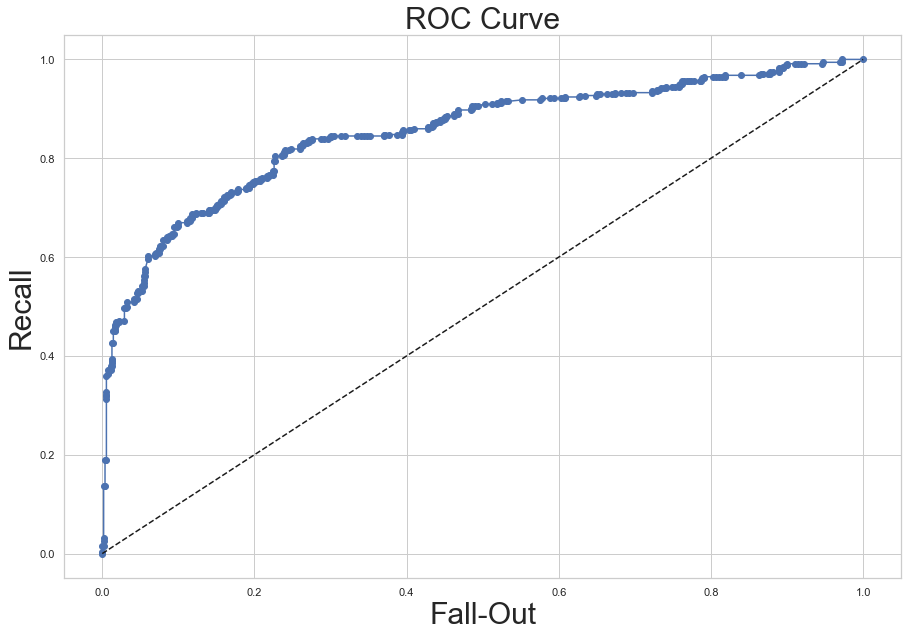

In [60]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

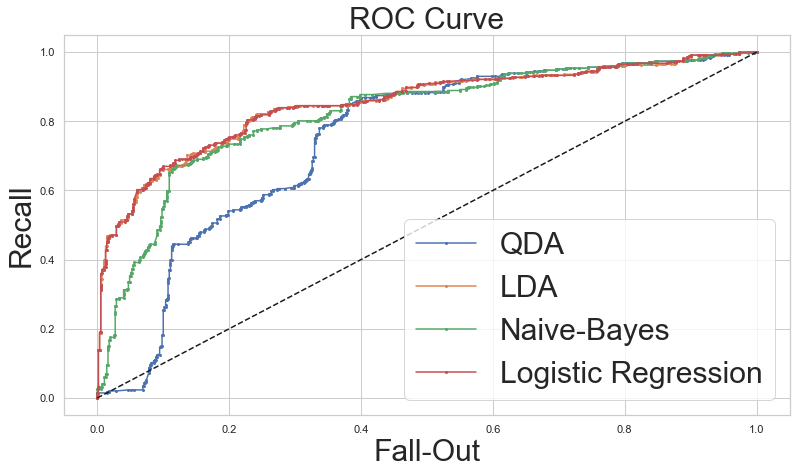

LDA의 AUC : 0.8508 / QDA의 AUC : 0.7486 / Naive-Bayes의 AUC : 0.8218 / Logistic : 0.852


In [61]:
from sklearn.metrics import auc

fpr1, tpr1, thresholds1 = roc_curve(y_train, qda.decision_function(X_train))
fpr2, tpr2, thresholds1 = roc_curve(y_train, lda.decision_function(X_train))
fpr3, tpr3, thresholds3 = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])
fpr4, tpr4, thresholds4 = roc_curve(y_train, Logit.predict_proba(X_train)[:, 1])

plt.figure(figsize=(13,7))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="QDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="LDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="Naive-Bayes")
plt.plot(fpr4, tpr4, 'o-', ms=2, label="Logistic Regression")
plt.legend(fontsize=30)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

auc_qda = auc(fpr1,tpr1)
auc_lda = auc(fpr2,tpr2)
auc_NB = auc(fpr3,tpr3)
auc_Logit = auc(fpr4,tpr4)
print("LDA의 AUC : {} / QDA의 AUC : {} / Naive-Bayes의 AUC : {} / Logistic : {}".
      format(round(auc_lda,4),round(auc_qda,4),round(auc_NB,4),round(auc_Logit,4)))


In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

qda_CV = cross_val_score(qda, X_train, y_train, scoring=None, cv=10)
lda_CV = cross_val_score(lda, X_train, y_train, scoring=None, cv=10)
NB_CV = cross_val_score(NB, X_train, y_train, scoring=None, cv=10)
Logit_CV = cross_val_score(Logit, X_train, y_train, scoring=None, cv=10)

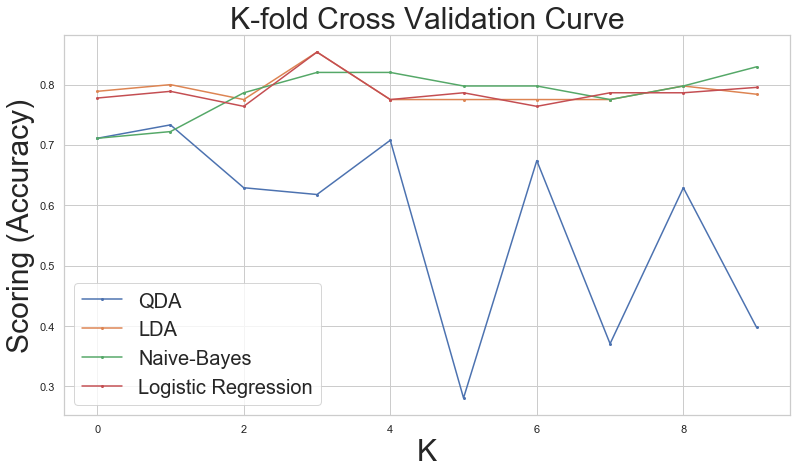

LDA : 0.7901 / QDA : 0.5752 / Naive-Bayes : 0.7858 / Logistic : 0.7879


In [63]:
plt.figure(figsize=(13,7))
plt.plot(qda_CV, 'o-', ms=2, label="QDA")
plt.plot(lda_CV, 'o-', ms=2, label="LDA")
plt.plot(NB_CV, 'o-', ms=2, label="Naive-Bayes")
plt.plot(Logit_CV, 'o-', ms=2, label="Logistic Regression")
plt.legend(fontsize=20)
plt.xlabel('K',fontsize=30)
plt.ylabel('Scoring (Accuracy)',fontsize=30)
plt.title('K-fold Cross Validation Curve',fontsize=30)
plt.show()


CV_qda = qda_CV.mean()
CV_lda = lda_CV.mean()
CV_NB = NB_CV.mean()
CV_Logit = Logit_CV.mean()
print("LDA : {} / QDA : {} / Naive-Bayes : {} / Logistic : {}".
      format(round(CV_lda,4),round(CV_qda,4),round(CV_NB,4),round(CV_Logit,4)))


### 3-7. Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 2).fit(X_train,y_train)

In [65]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(DT.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[490,  59],
       [ 95, 247]])

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       549
           1       0.81      0.72      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.83      0.83      0.83       891



In [67]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, DT.predict_proba(X_train)[:, 1])

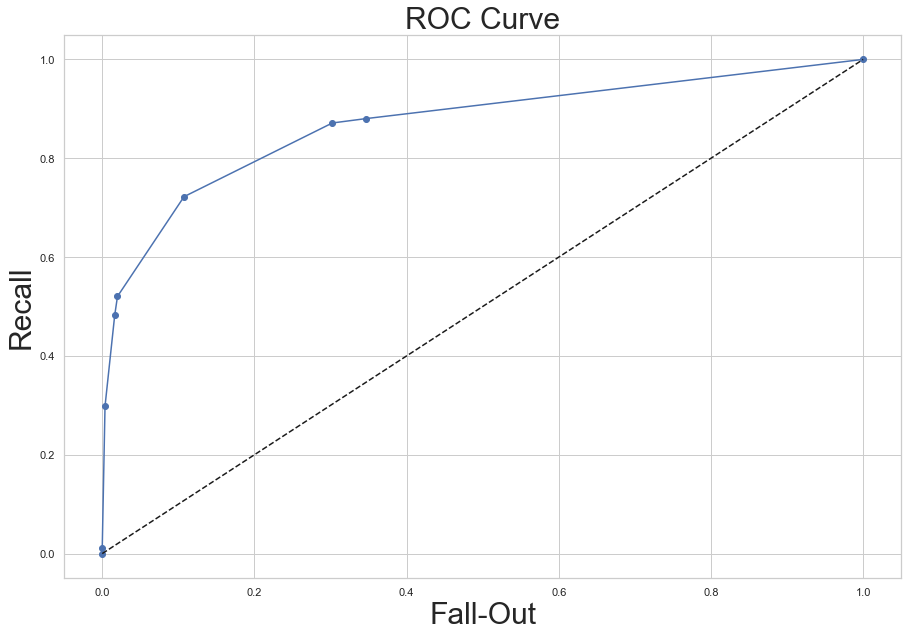

In [68]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="DT")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

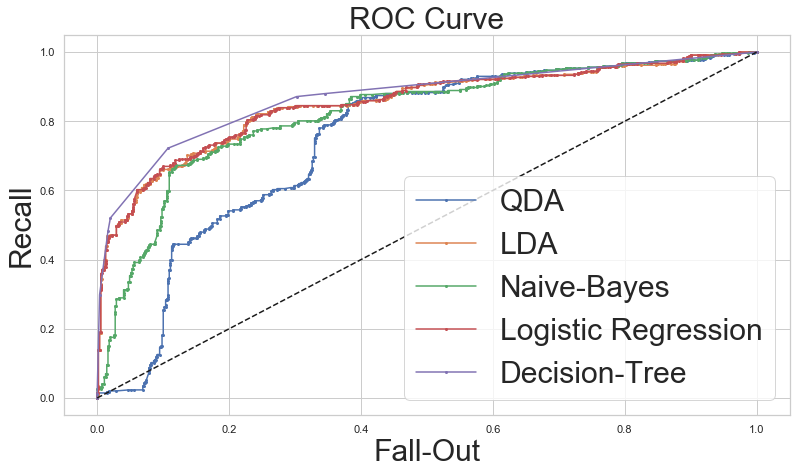

LDA의 AUC : 0.8508 / QDA의 AUC : 0.7486 / Naive-Bayes의 AUC : 0.8218 / Logistic : 0.852 / DT : 0.87


In [69]:
from sklearn.metrics import auc

fpr1, tpr1, thresholds1 = roc_curve(y_train, qda.decision_function(X_train))
fpr2, tpr2, thresholds1 = roc_curve(y_train, lda.decision_function(X_train))
fpr3, tpr3, thresholds3 = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])
fpr4, tpr4, thresholds4 = roc_curve(y_train, Logit.predict_proba(X_train)[:, 1])
fpr5, tpr5, thresholds5 = roc_curve(y_train, DT.predict_proba(X_train)[:, 1])

plt.figure(figsize=(13,7))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="QDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="LDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="Naive-Bayes")
plt.plot(fpr4, tpr4, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr5, tpr5, 'o-', ms=2, label="Decision-Tree")
plt.legend(fontsize=30)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

auc_qda = auc(fpr1,tpr1)
auc_lda = auc(fpr2,tpr2)
auc_NB = auc(fpr3,tpr3)
auc_Logit = auc(fpr4,tpr4)
auc_DT = auc(fpr5,tpr5)
print("LDA의 AUC : {} / QDA의 AUC : {} / Naive-Bayes의 AUC : {} / Logistic : {} / DT : {}".
      format(round(auc_lda,4),round(auc_qda,4),round(auc_NB,4),round(auc_Logit,4),round(auc_DT,4)))


In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

qda_CV = cross_val_score(qda, X_train, y_train, scoring=None, cv=10)
lda_CV = cross_val_score(lda, X_train, y_train, scoring=None, cv=10)
NB_CV = cross_val_score(NB, X_train, y_train, scoring=None, cv=10)
Logit_CV = cross_val_score(Logit, X_train, y_train, scoring=None, cv=10)
DT_CV = cross_val_score(DT, X_train, y_train, scoring=None, cv=10)

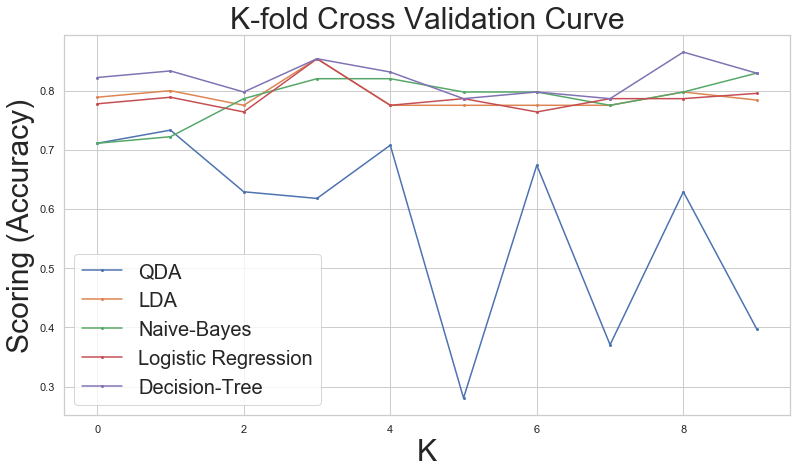

LDA : 0.7901 / QDA : 0.5752 / Naive-Bayes : 0.7858 / Logistic : 0.7879 / Decision-Tree : 0.8204


In [71]:
plt.figure(figsize=(13,7))
plt.plot(qda_CV, 'o-', ms=2, label="QDA")
plt.plot(lda_CV, 'o-', ms=2, label="LDA")
plt.plot(NB_CV, 'o-', ms=2, label="Naive-Bayes")
plt.plot(Logit_CV, 'o-', ms=2, label="Logistic Regression")
plt.plot(DT_CV, 'o-', ms=2, label="Decision-Tree")
plt.legend(fontsize=20)
plt.xlabel('K',fontsize=30)
plt.ylabel('Scoring (Accuracy)',fontsize=30)
plt.title('K-fold Cross Validation Curve',fontsize=30)
plt.show()


CV_qda = qda_CV.mean()
CV_lda = lda_CV.mean()
CV_NB = NB_CV.mean()
CV_Logit = Logit_CV.mean()
CV_DT = DT_CV.mean()
print("LDA : {} / QDA : {} / Naive-Bayes : {} / Logistic : {} / Decision-Tree : {}".
      format(round(CV_lda,4),round(CV_qda,4),round(CV_NB,4),round(CV_Logit,4),round(CV_DT,4)))


### 3-8. Bagging

In [72]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,random_state=0).fit(
    X_train,y_train)

In [73]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(bagging.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[466,  83],
       [102, 240]])

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [75]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, bagging.predict_proba(X_train)[:, 1])

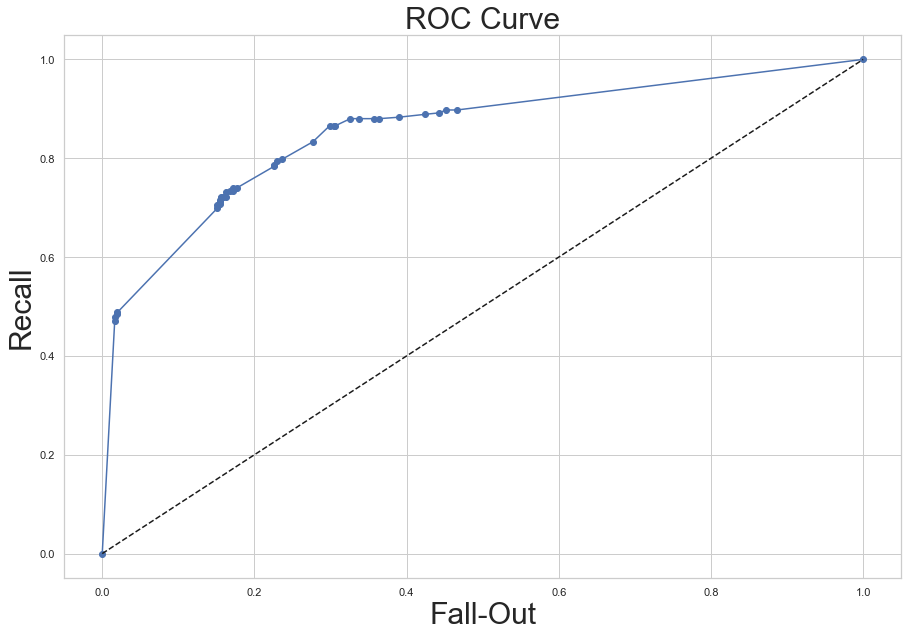

In [76]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="bagging")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

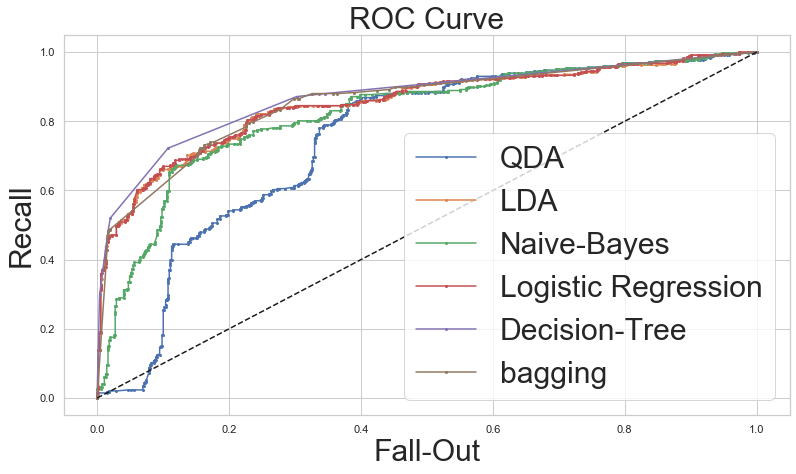

LDA의 AUC : 0.8508 / QDA의 AUC : 0.7486 / Naive-Bayes의 AUC : 0.8218 / Logistic : 0.852 / DT : 0.87 / baggin : 0.854


In [77]:
from sklearn.metrics import auc

fpr1, tpr1, thresholds1 = roc_curve(y_train, qda.decision_function(X_train))
fpr2, tpr2, thresholds1 = roc_curve(y_train, lda.decision_function(X_train))
fpr3, tpr3, thresholds3 = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])
fpr4, tpr4, thresholds4 = roc_curve(y_train, Logit.predict_proba(X_train)[:, 1])
fpr5, tpr5, thresholds5 = roc_curve(y_train, DT.predict_proba(X_train)[:, 1])
fpr6, tpr6, thresholds6 = roc_curve(y_train, bagging.predict_proba(X_train)[:, 1])

plt.figure(figsize=(13,7))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="QDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="LDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="Naive-Bayes")
plt.plot(fpr4, tpr4, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr5, tpr5, 'o-', ms=2, label="Decision-Tree")
plt.plot(fpr6, tpr6, 'o-', ms=2, label="bagging")
plt.legend(fontsize=30)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

auc_qda = auc(fpr1,tpr1)
auc_lda = auc(fpr2,tpr2)
auc_NB = auc(fpr3,tpr3)
auc_Logit = auc(fpr4,tpr4)
auc_DT = auc(fpr5,tpr5)
auc_bagging = auc(fpr6,tpr6)
print("LDA의 AUC : {} / QDA의 AUC : {} / Naive-Bayes의 AUC : {} / Logistic : {} / DT : {} / baggin : {}".
      format(round(auc_lda,4),round(auc_qda,4),round(auc_NB,4),round(auc_Logit,4),round(auc_DT,4),
            round(auc_bagging,3)))


### 3-9. Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3,n_estimators=100,random_state=0).fit(X_train,y_train)

In [79]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(rf.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[521,  28],
       [125, 217]])

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       549
           1       0.89      0.63      0.74       342

    accuracy                           0.83       891
   macro avg       0.85      0.79      0.81       891
weighted avg       0.84      0.83      0.82       891



In [81]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, rf.predict_proba(X_train)[:, 1])

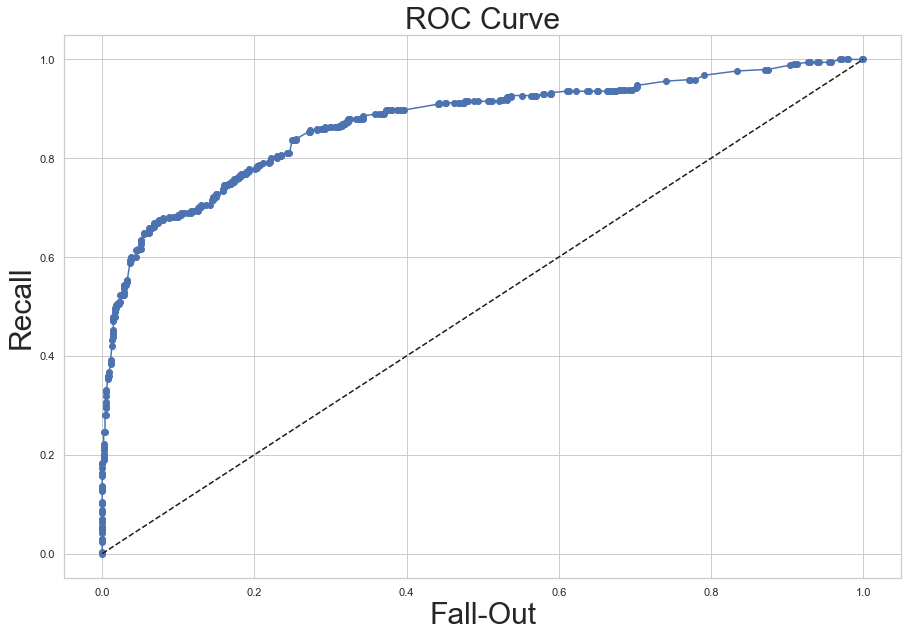

In [82]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="random forest")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

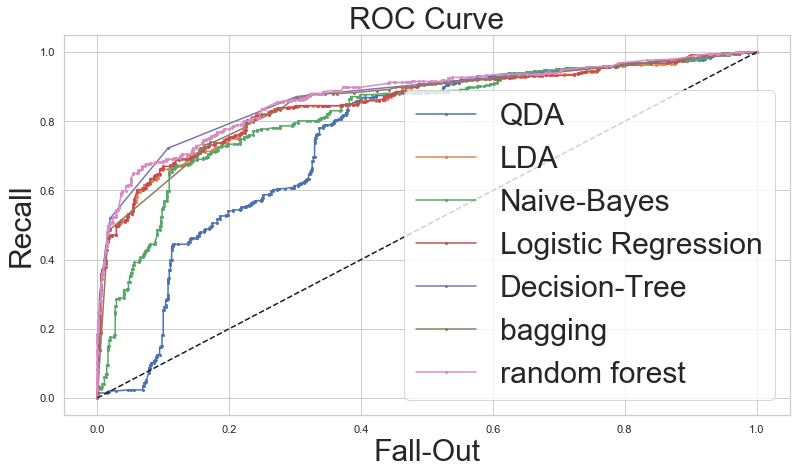

LDA의 AUC : 0.8508 / QDA의 AUC : 0.7486 / Naive-Bayes의 AUC : 0.8218 / Logistic : 0.852 / DT : 0.87 / baggin : 0.8539 / random_forest : 0.8716


In [83]:
from sklearn.metrics import auc

fpr1, tpr1, thresholds1 = roc_curve(y_train, qda.decision_function(X_train))
fpr2, tpr2, thresholds1 = roc_curve(y_train, lda.decision_function(X_train))
fpr3, tpr3, thresholds3 = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])
fpr4, tpr4, thresholds4 = roc_curve(y_train, Logit.predict_proba(X_train)[:, 1])
fpr5, tpr5, thresholds5 = roc_curve(y_train, DT.predict_proba(X_train)[:, 1])
fpr6, tpr6, thresholds6 = roc_curve(y_train, bagging.predict_proba(X_train)[:, 1])
fpr7, tpr7, thresholds7 = roc_curve(y_train, rf.predict_proba(X_train)[:, 1])

plt.figure(figsize=(13,7))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="QDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="LDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="Naive-Bayes")
plt.plot(fpr4, tpr4, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr5, tpr5, 'o-', ms=2, label="Decision-Tree")
plt.plot(fpr6, tpr6, 'o-', ms=2, label="bagging")
plt.plot(fpr7, tpr7, 'o-', ms=2, label="random forest")
plt.legend(fontsize=30)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

auc_qda = auc(fpr1,tpr1)
auc_lda = auc(fpr2,tpr2)
auc_NB = auc(fpr3,tpr3)
auc_Logit = auc(fpr4,tpr4)
auc_DT = auc(fpr5,tpr5)
auc_bagging = auc(fpr6,tpr6)
auc_rf = auc(fpr7,tpr7)
print("LDA의 AUC : {} / QDA의 AUC : {} / Naive-Bayes의 AUC : {} / Logistic : {} / DT : {} / baggin : {} / random_forest : {}".
      format(round(auc_lda,4),round(auc_qda,4),round(auc_NB,4),round(auc_Logit,4),round(auc_DT,4),
            round(auc_bagging,4),round(auc_rf,4)))


### 3-10. Ada boost

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,random_state=0)).fit(X_train,y_train)

In [86]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(ada.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[518,  31],
       [ 57, 285]])

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       549
           1       0.90      0.83      0.87       342

    accuracy                           0.90       891
   macro avg       0.90      0.89      0.89       891
weighted avg       0.90      0.90      0.90       891



In [88]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, ada.predict_proba(X_train)[:, 1])

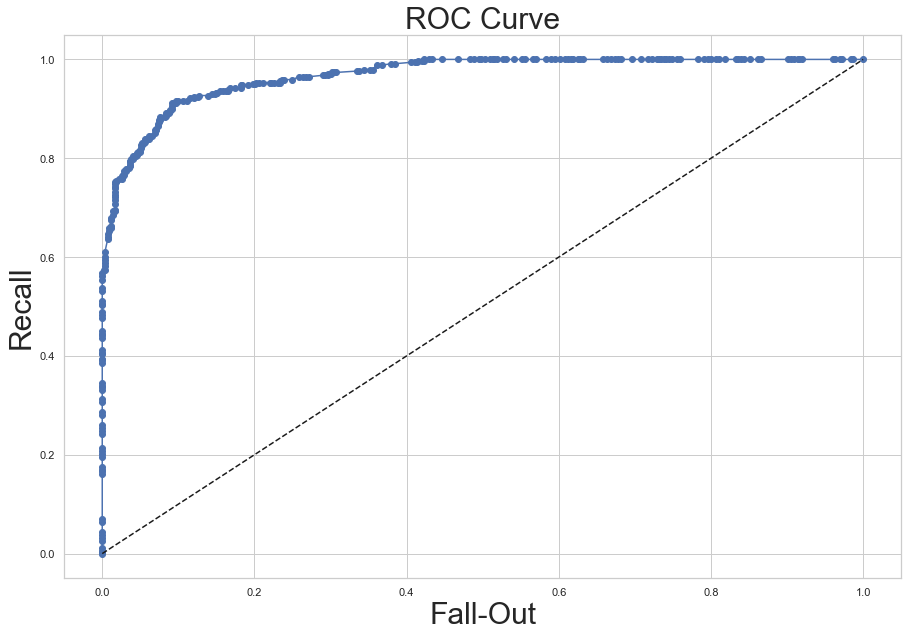

In [89]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="ada boost")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

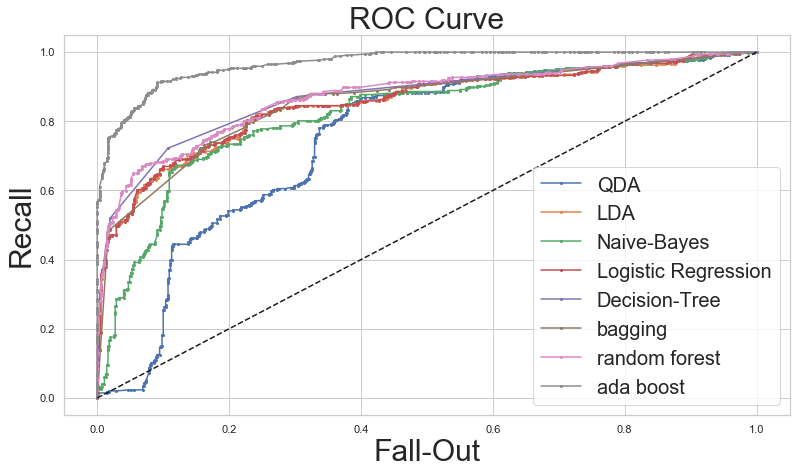

LDA의 AUC : 0.8508 / QDA의 AUC : 0.7486 / Naive-Bayes의 AUC : 0.8218 / Logistic : 0.852 / DT : 0.87 / baggin : 0.8539       / random_forest : 0.8716 / ada_boost : 0.9677


In [90]:
from sklearn.metrics import auc

fpr1, tpr1, thresholds1 = roc_curve(y_train, qda.decision_function(X_train))
fpr2, tpr2, thresholds1 = roc_curve(y_train, lda.decision_function(X_train))
fpr3, tpr3, thresholds3 = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])
fpr4, tpr4, thresholds4 = roc_curve(y_train, Logit.predict_proba(X_train)[:, 1])
fpr5, tpr5, thresholds5 = roc_curve(y_train, DT.predict_proba(X_train)[:, 1])
fpr6, tpr6, thresholds6 = roc_curve(y_train, bagging.predict_proba(X_train)[:, 1])
fpr7, tpr7, thresholds7 = roc_curve(y_train, rf.predict_proba(X_train)[:, 1])
fpr8, tpr8, thresholds8 = roc_curve(y_train, ada.predict_proba(X_train)[:, 1])

plt.figure(figsize=(13,7))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="QDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="LDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="Naive-Bayes")
plt.plot(fpr4, tpr4, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr5, tpr5, 'o-', ms=2, label="Decision-Tree")
plt.plot(fpr6, tpr6, 'o-', ms=2, label="bagging")
plt.plot(fpr7, tpr7, 'o-', ms=2, label="random forest")
plt.plot(fpr8, tpr8, 'o-', ms=2, label="ada boost")
plt.legend(fontsize=20)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

auc_qda = auc(fpr1,tpr1)
auc_lda = auc(fpr2,tpr2)
auc_NB = auc(fpr3,tpr3)
auc_Logit = auc(fpr4,tpr4)
auc_DT = auc(fpr5,tpr5)
auc_bagging = auc(fpr6,tpr6)
auc_rf = auc(fpr7,tpr7)
auc_ada = auc(fpr8,tpr8)
print("LDA의 AUC : {} / QDA의 AUC : {} / Naive-Bayes의 AUC : {} / Logistic : {} / DT : {} / baggin : {} \
      / random_forest : {} / ada_boost : {}".
      format(round(auc_lda,4),round(auc_qda,4),round(auc_NB,4),round(auc_Logit,4),round(auc_DT,4),
            round(auc_bagging,4),round(auc_rf,4),round(auc_ada,4)))


### 3-11. XGBoost

In [91]:
import xgboost

In [92]:
xgb = xgboost.XGBClassifier(n_extimators = 100, max_depth = 2, random_state = 0).fit(X_train,y_train)

In [93]:
from sklearn.metrics import confusion_matrix

y_pred = pd.DataFrame(xgb.predict(X_train))

confusion_matrix(y_train, y_pred)

array([[519,  30],
       [108, 234]])

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       549
           1       0.89      0.68      0.77       342

    accuracy                           0.85       891
   macro avg       0.86      0.81      0.83       891
weighted avg       0.85      0.85      0.84       891



In [95]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, xgb.predict_proba(X_train)[:, 1])

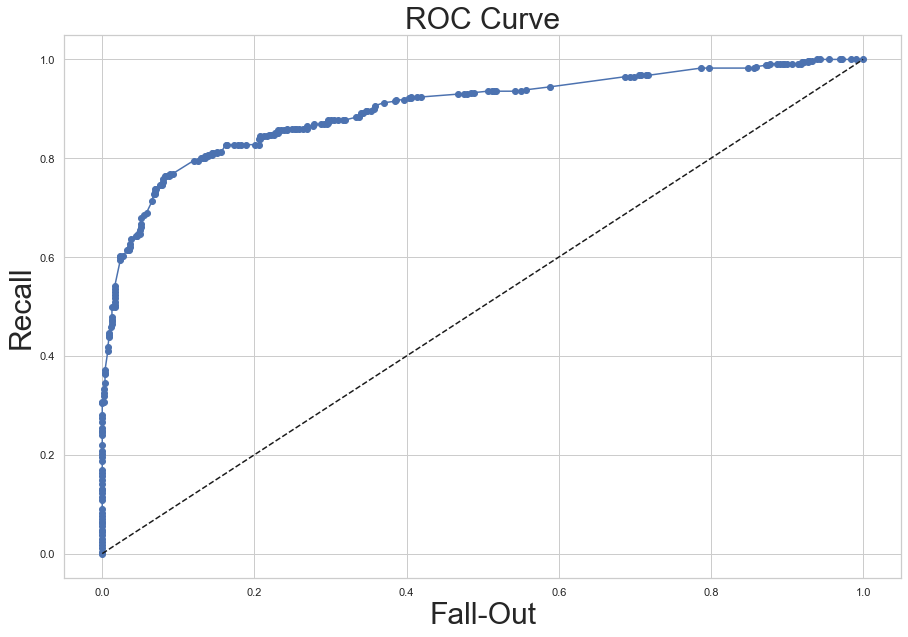

In [96]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, 'o-', label="XGBoost")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

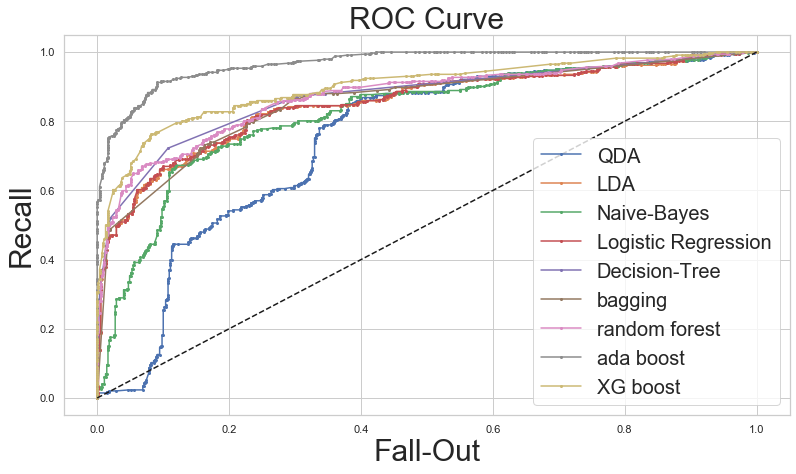

LDA의 AUC : 0.8508 / QDA의 AUC : 0.7486 / Naive-Bayes의 AUC : 0.8218 / Logistic : 0.852 / DT : 0.87 / baggin : 0.8539       / random_forest : 0.8716 / ada_boost : 0.9677 / XGBoost : 0.8988


In [97]:
from sklearn.metrics import auc

fpr1, tpr1, thresholds1 = roc_curve(y_train, qda.decision_function(X_train))
fpr2, tpr2, thresholds1 = roc_curve(y_train, lda.decision_function(X_train))
fpr3, tpr3, thresholds3 = roc_curve(y_train, NB.predict_proba(X_train)[:, 1])
fpr4, tpr4, thresholds4 = roc_curve(y_train, Logit.predict_proba(X_train)[:, 1])
fpr5, tpr5, thresholds5 = roc_curve(y_train, DT.predict_proba(X_train)[:, 1])
fpr6, tpr6, thresholds6 = roc_curve(y_train, bagging.predict_proba(X_train)[:, 1])
fpr7, tpr7, thresholds7 = roc_curve(y_train, rf.predict_proba(X_train)[:, 1])
fpr8, tpr8, thresholds8 = roc_curve(y_train, ada.predict_proba(X_train)[:, 1])
fpr9, tpr9, thresholds9 = roc_curve(y_train, xgb.predict_proba(X_train)[:, 1])

plt.figure(figsize=(13,7))
plt.plot(fpr1, tpr1, 'o-', ms=2, label="QDA")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="LDA")
plt.plot(fpr3, tpr3, 'o-', ms=2, label="Naive-Bayes")
plt.plot(fpr4, tpr4, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr5, tpr5, 'o-', ms=2, label="Decision-Tree")
plt.plot(fpr6, tpr6, 'o-', ms=2, label="bagging")
plt.plot(fpr7, tpr7, 'o-', ms=2, label="random forest")
plt.plot(fpr8, tpr8, 'o-', ms=2, label="ada boost")
plt.plot(fpr9, tpr9, 'o-', ms=2, label="XG boost")
plt.legend(fontsize=20)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out',fontsize=30)
plt.ylabel('Recall',fontsize=30)
plt.title('ROC Curve',fontsize=30)
plt.show()

auc_qda = auc(fpr1,tpr1)
auc_lda = auc(fpr2,tpr2)
auc_NB = auc(fpr3,tpr3)
auc_Logit = auc(fpr4,tpr4)
auc_DT = auc(fpr5,tpr5)
auc_bagging = auc(fpr6,tpr6)
auc_rf = auc(fpr7,tpr7)
auc_ada = auc(fpr8,tpr8)
auc_xgb = auc(fpr9,tpr9)
print("LDA의 AUC : {} / QDA의 AUC : {} / Naive-Bayes의 AUC : {} / Logistic : {} / DT : {} / baggin : {} \
      / random_forest : {} / ada_boost : {} / XGBoost : {}".
      format(round(auc_lda,4),round(auc_qda,4),round(auc_NB,4),round(auc_Logit,4),round(auc_DT,4),
            round(auc_bagging,4),round(auc_rf,4),round(auc_ada,4),round(auc_xgb,4)))


In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

qda_CV = cross_val_score(qda, X_train, y_train, scoring=None, cv=10)
lda_CV = cross_val_score(lda, X_train, y_train, scoring=None, cv=10)
NB_CV = cross_val_score(NB, X_train, y_train, scoring=None, cv=10)
Logit_CV = cross_val_score(Logit, X_train, y_train, scoring=None, cv=10)
DT_CV = cross_val_score(DT, X_train, y_train, scoring=None, cv=10)
bag_CV = cross_val_score(bagging, X_train, y_train, scoring=None, cv=10)
rf_CV = cross_val_score(rf, X_train, y_train, scoring=None, cv=10)
ada_CV = cross_val_score(ada, X_train, y_train, scoring=None, cv=10)
xgb_CV = cross_val_score(xgb, X_train, y_train, scoring=None, cv=10)

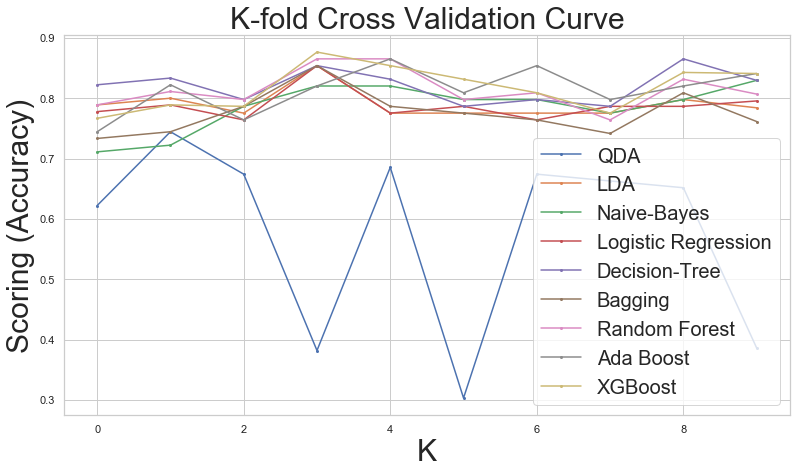

LDA의 AUC : 0.7901 / QDA의 AUC : 0.5787 / Naive-Bayes의 AUC : 0.7858 / Logistic : 0.7879 / DT : 0.8204 / baggin : 0.7756       / random_forest : 0.8137 / ada_boost : 0.8138 / XGBoost : 0.8172


In [99]:
plt.figure(figsize=(13,7))
plt.plot(qda_CV, 'o-', ms=2, label="QDA")
plt.plot(lda_CV, 'o-', ms=2, label="LDA")
plt.plot(NB_CV, 'o-', ms=2, label="Naive-Bayes")
plt.plot(Logit_CV, 'o-', ms=2, label="Logistic Regression")
plt.plot(DT_CV, 'o-', ms=2, label="Decision-Tree")
plt.plot(bag_CV, 'o-', ms=2, label="Bagging")
plt.plot(rf_CV, 'o-', ms=2, label="Random Forest")
plt.plot(ada_CV, 'o-', ms=2, label="Ada Boost")
plt.plot(xgb_CV, 'o-', ms=2, label="XGBoost")
plt.legend(fontsize=20)
plt.xlabel('K',fontsize=30)
plt.ylabel('Scoring (Accuracy)',fontsize=30)
plt.title('K-fold Cross Validation Curve',fontsize=30)
plt.show()


CV_qda = qda_CV.mean()
CV_lda = lda_CV.mean()
CV_NB = NB_CV.mean()
CV_Logit = Logit_CV.mean()
CV_DT = DT_CV.mean()
CV_bag = bag_CV.mean()
CV_rf = rf_CV.mean()
CV_ada = ada_CV.mean()
CV_xgb = xgb_CV.mean()
print("LDA의 AUC : {} / QDA의 AUC : {} / Naive-Bayes의 AUC : {} / Logistic : {} / DT : {} / baggin : {} \
      / random_forest : {} / ada_boost : {} / XGBoost : {}".
      format(round(CV_lda,4),round(CV_qda,4),round(CV_NB,4),round(CV_Logit,4),round(CV_DT,4)\
            ,round(CV_bag,4),round(CV_rf,4),round(CV_ada,4),round(CV_xgb,4)))
